# Prediccion de enfermedades cardiacas

Las emfermedades cardiovasculares (ECV) son la principal causa de muerte en el mundo. Cada año mueren más personas por ECV que por cualquier otra 
cosa, segun estimaciones en se cobran la vida de 17.9 millones de personas cada año. Estas enfermedades constituyen un grupo de transtornos del 
corazon y los vasos sanguineos que incluyen cardiopatias coronarias, enfermedades cerebrovasculares y cardiopatias reumaticas. Segun estudios una
tercera parte de estas muertes suceden prematuramente en menores de 70 años.

Fuente: https://www.who.int/es/health-topics/cardiovascular-diseases#tab=tab_1

In [48]:
# Importacion de librerias necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import psycopg2

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [49]:
# Carga de datos.
heart_df = pd.read_csv('../data/heart.csv')

## 1. Observación general de los datos

Primero se comienza haciendo un repaso por los datos y como estos se conforman, para ello se utilizan algunas funciones de la libreria pandas para 
asi darnos una idea general de como se componen estos datos, como deberiamos comenzar a limpiarlos y cuales son las posibles preguntas que nos 
ayudarian a reponder.

### Descripcion de las columnas

1. ***age***: edad de la persona en años
2. ***sex***: sexo de la persona (0 = mujer, 1 = hombre)
3. ***cp***: dolor toraxico experimentado (0 = angina tipica, 1 = angina atipica, 2 = dolor no anginoso, 3 = asintomatico)
4. ***trestbps***: presion arterial de la persona en reposo (mm/Hg al momento de ingresar al hospital)
5. ***chol***: colesterol de la persona en mg/dl
6. ***fbs***: nivel de azucar en la sangre de la persona en ayunas (> 120 mg/dl, 0 = falso, 1 = verdadero)
7. ***restecg***: medicion de electrocardiograma en reposo (0 = normal, 1 = con anomalia de la onda ST-T, 2 = que muestra hipertrofia ventricular 
izquierda probable o definitiva segun los criterios de "Estes")
8. ***thalach***: frecuencia cardiaca maxima alcanzada por la persona
9. ***exang***: angina inducida por el ejercicio (0 = no, 1 = si)
10. ***oldpeak***: depresion del segmento ST inducida por el ejercicio en relacion al reposo ("ST" está relacionado con la posicion en la gráfica del
electrocardiograma.
11. ***slope***: la pendiente del segmento ST del ejecicio maximo ( 0 = pendiente ascendente, 1 = plano, 2 = pendiente descendente)
12. ***ca***: el número de vasos principales (0-3) coloreado por fluroscopia
13. ***thal***: un trastorno sanguineo llamado talasemia (0 = normal, 1 = defecto solucionado, 2 = defecto reversible)
14. ***target***: enfermedad cardiaca (0 = no, 1 = si)   

In [50]:
# Consultar el número de filas y columnas.
heart_df.shape

(1025, 14)

In [51]:
# Ver las primeras 5 filas del DataFrame.
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [52]:
# Me permite ver de forma rapida las estadisticas descriptivas del DataFrame y asi puedo obtener una idea general rapida de la distribuccion de los
# datos
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [53]:
# Me permite observar los tipos de datos de las columnas y si tienen valores nulos para hacer su debido procesamiento.
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [54]:
# Esto me permite observar una muestra aleatoria de 3 elementos del DataFrame.
heart_df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
776,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
609,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
983,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1


In [55]:
# Observar si existen valores nulos.
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [56]:
# Esto me permite ver que tan correlacionadas están las columnas con la columna objetivo "target", y como se puede observar todas están medianamente
# correlacionadas a exepcion de la columna "fbs" que esta debilmente correlacionada.
heart_df.corr()['target'].abs().sort_values(ascending=False)

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64

## 2. Analisis exploratorio de datos

### Pacientes con enfermedad cardiaca VS sin enfermedad cardiaca

Mediante la siguiente gráfica de barras se puede comparar como están distriubuidos los diferentes valores de la variable objetiva "target".
Basandonos en el gráfico se puede concluir que existen más personas enfermas que personas no enfermas, las personas con afecciones cardiacas son 
en total 526 y las que no tienen probelmas cardiovasculares son en total 499.

target
1    526
0    499
Name: count, dtype: int64


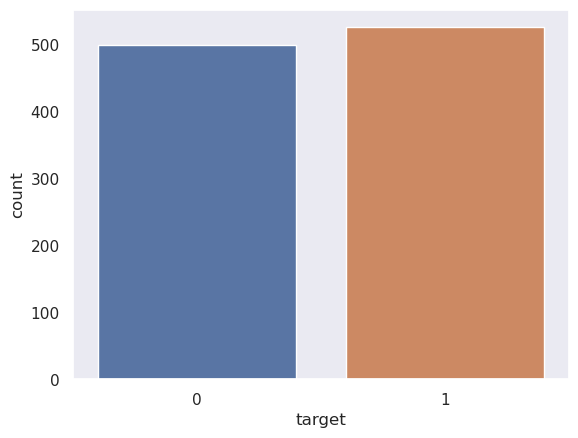

In [57]:
ax1 = sns.countplot(x=heart_df['target'])
v1 = heart_df.target.value_counts()
print(v1)

Mediante el siguiente gráfico se puede observar que el 51.32% de las personas registradas en los datos presentan una enfermedad cardiovascular y el
48.68% no padece ninguna enfermedad cardiaca.

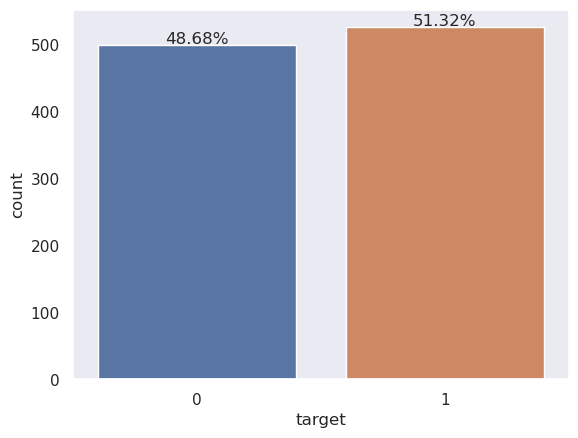

In [58]:
ax2 = sns.countplot(x=heart_df['target'])
total = len(heart_df['target'])

for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2., height + 3, '{:.2f}%'.format((height/total)*100), ha="center")

### Pacientes mujeres VS hombres
Con la siguiente gráfica circular se puede observar que el porcentaje de mujeres es del 30.4% para un total de 312, y el porcentaje de hombres es de
69.6% para un total de 713. Esto nos puede ser util, ya que como se puede evidenciar la diferencia siempre es bastante, entonces probablemente 
también el mayor número de enfermos sean hombres, pero no necesariamente sean los que más tienden a enfermarse, eso abria que determinarlo.

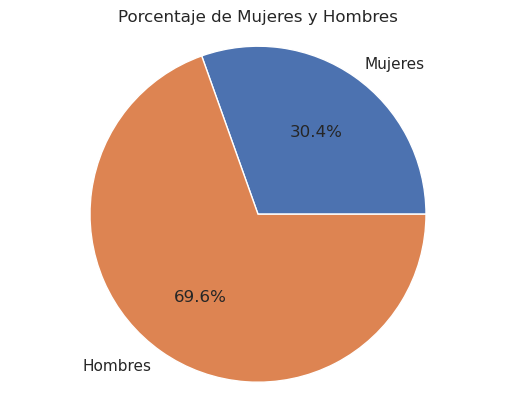

sex
1    713
0    312
Name: count, dtype: int64

In [59]:
porcentaje_mujeres = (heart_df['sex'] == 0).mean() * 100
porcentaje_hombres = (heart_df['sex'] == 1).mean() * 100

plt.pie([porcentaje_mujeres, porcentaje_hombres], labels=['Mujeres', 'Hombres'], autopct='%1.1f%%')
plt.title('Porcentaje de Mujeres y Hombres')
plt.axis('equal')
plt.show()

v2 = heart_df.sex.value_counts()
v2

### Distribucción de pacientes enfermos segun el sexo
 
Con esta gráfica se puede observar como están distribuidos los pacientes (enfermos, no enfermos) en ambos sexos. Como era de esperarse segun los
datos, en relacion con las mujeres para los pacientes enfermos hay más hombres, pero para pacientes que no tienen una enfermedad cardiaca 
los hombres también son mayoria, pero esto puede deberse simplemente a como están organizados los datos y la cantidad de hombres con respecto a la
cantidad de mujeres.

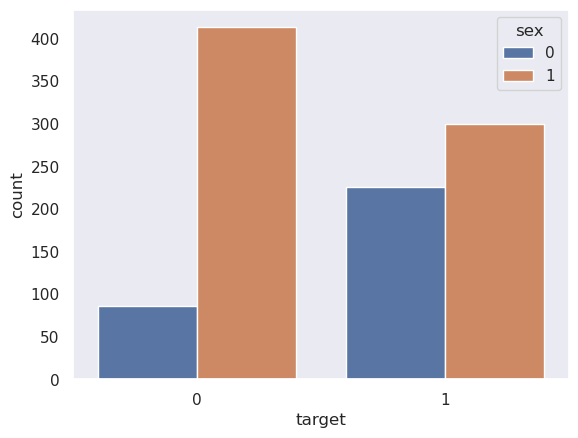

In [60]:
ax4 = sns.countplot(x='target', data=heart_df, hue='sex')

### Relacion entre los pacientes enfermos y la edad

Con la siguiente gráfica de densidad de kernel se puede observar que la curva azul (pacientes sin enfermedad cardiaca)
tiene una forma unimodal con un pico central al rededor de los 50 años, esto me indica que la mayoria
de los pacientes sin enfermedad cardiaca se encuentran en ese rango de edad. La curva roja (con enfermedad cardíaca)
también presenta una forma unimodal, pero con un pico central más alto y desplazado hacia la derecha, alrededor de
los 60 años. Esto sugiere que la enfermedad cardíaca es más común en pacientes de mayor edad.

Las dos curvas se superponen en cierto grado, lo que indica que existe cierta variabilidad en la edad de los 
pacientes tanto con como sin enfermedad cardíaca. Sin embargo, la mayor parte de la masa de la curva roja se 
encuentra a la derecha de la curva azul, lo que refuerza la idea de que la enfermedad cardíaca es más prevalente en
grupos de edad más avanzada.

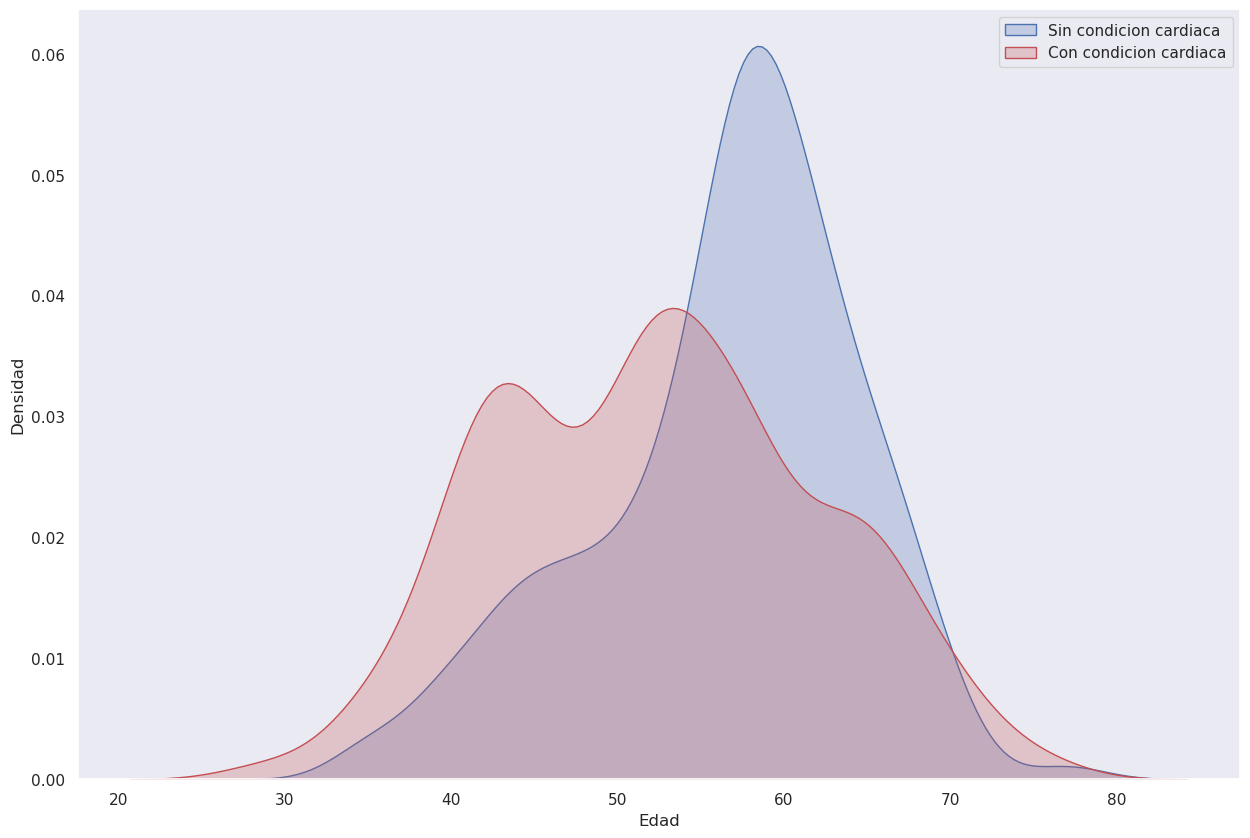

In [61]:
def plot_kde():
    plt.figure(figsize=(15, 10))
    
    sns.kdeplot(heart_df.loc[(heart_df['target']==0), 'age'], color='b', fill=True, label='Sin condicion cardiaca')
    sns.kdeplot(heart_df.loc[(heart_df['target']==1), 'age'], color='r', fill=True, label='Con condicion cardiaca')
 
    plt.xlabel('Edad')
    plt.ylabel('Densidad')
    
    plt.legend()
    plt.show()

plot_kde()

En el gráfico siguiente se relaciona la probabilidad de tener una enfermedad cardiaca de acuerdo a la edad. Puede parecer un poco inpreciso afirmar
que es menos probable que una persona esté enferma a loas 60 años, pero solo analizando los datos que tenemos se puede decir que para este conjunto
en especial es menos probable que una persona esté enferma cerca de los 61 años y esto es debido porque en este mismo rango de edad está el pico de
personas que están sanas. ***NOTA***: esto solo aplica a este conjunto de datos en especial, no es hecho que esto sea asi siempre de hecho es más 
probable lo contrario.

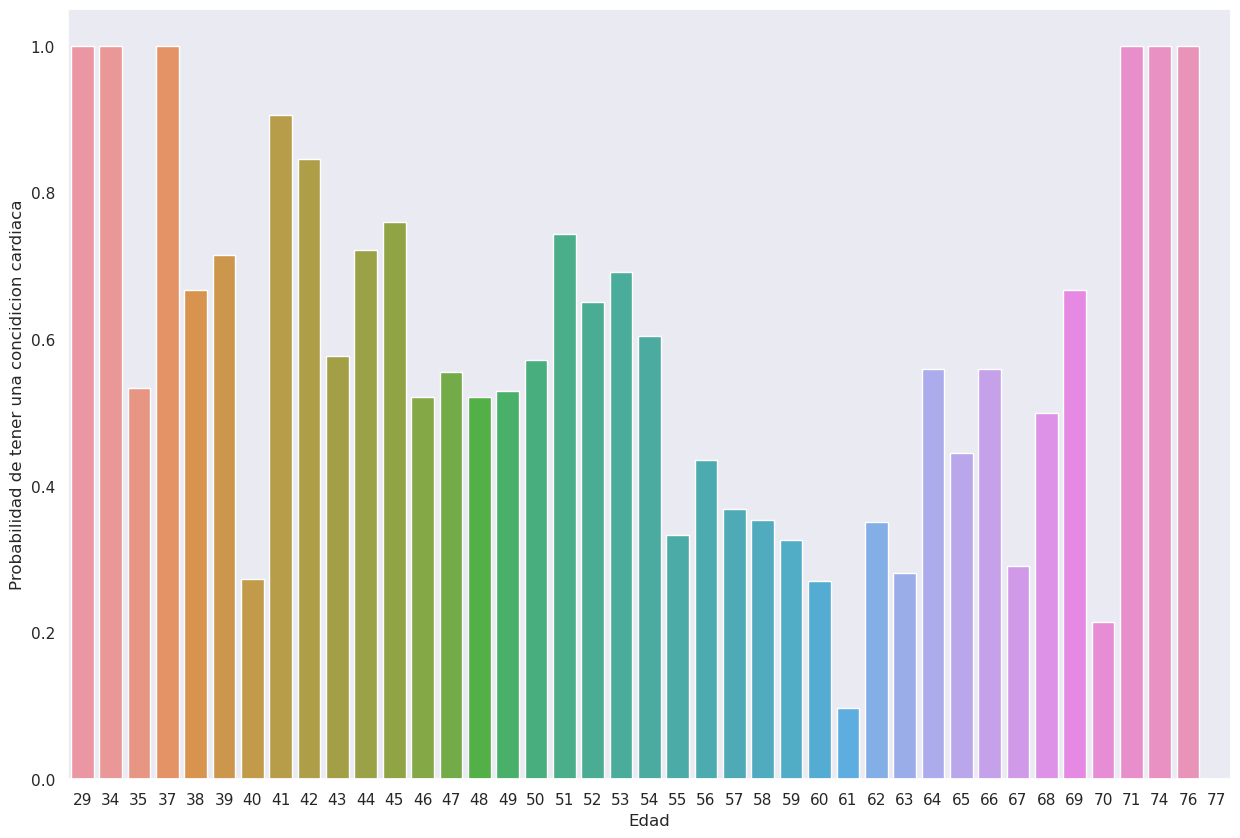

In [62]:
def plot_probabilidad():
    plt.figure(figsize=(15, 10))
    
    avg = heart_df[['age', 'target']].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='target', data=avg)
    plt.xlabel('Edad')
    plt.ylabel('Probabilidad de tener una concidicion cardiaca')
    plt.show()
    
plot_probabilidad()

Esta gráfica me permite ver cuál es la frecuencia de la enfermedad segun la edad de las personas de acuerdo al conjunto de datos que se tiene.
Corroborando la gráfica anterior se puede decir que las personas que menos están enfermas son las de 61 años, de lo cual entonces se puede concluir
que son las personas que menor probabilidad tienen de enfermarse, para estos datos en especial.

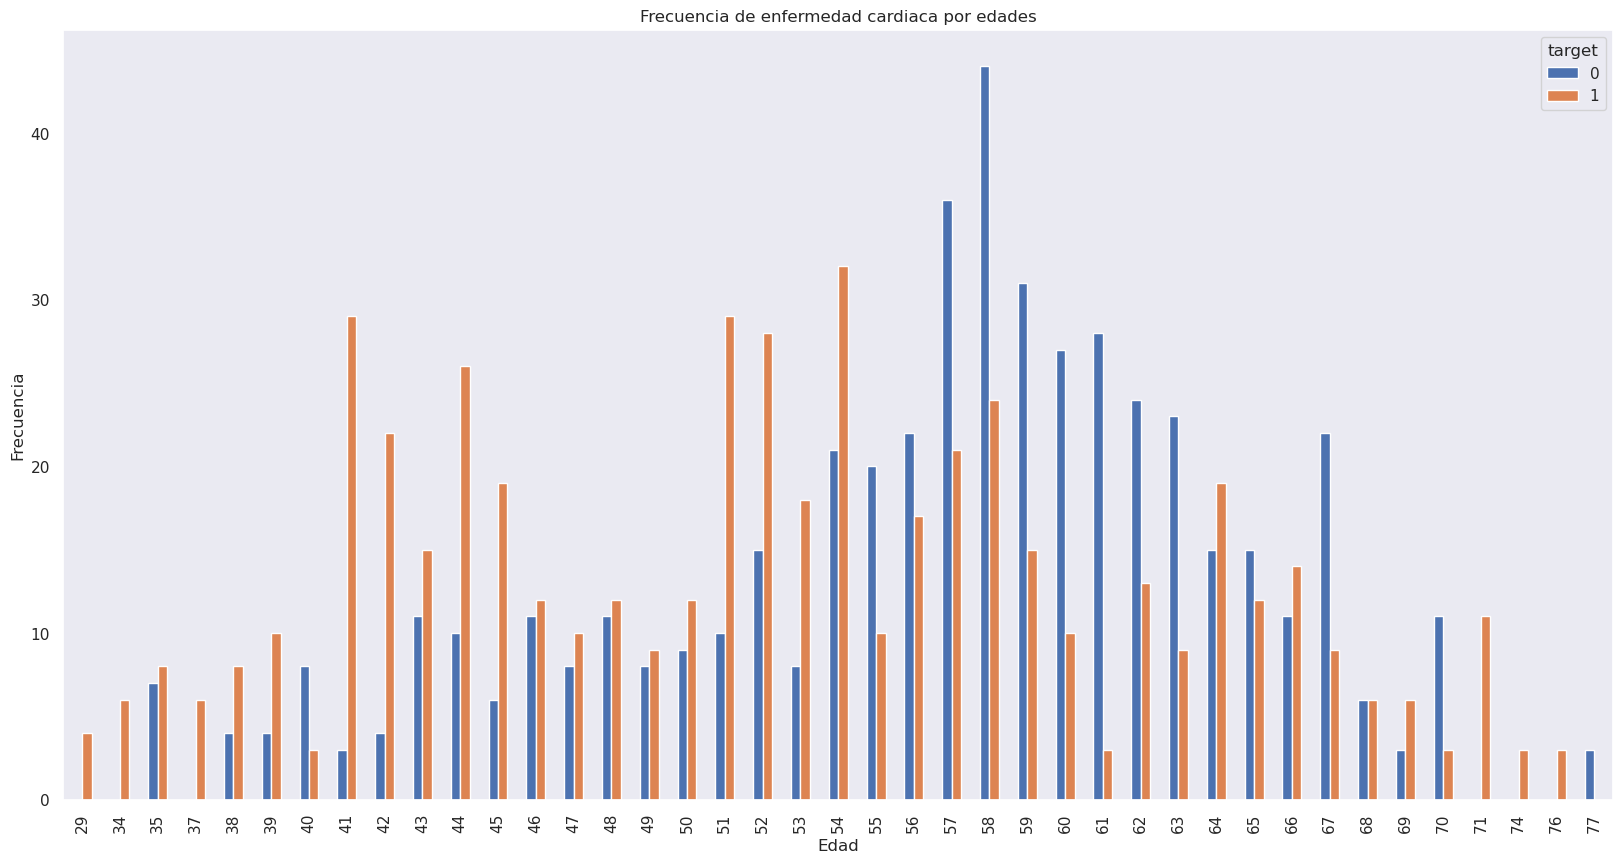

In [63]:
pd.crosstab(heart_df.age, heart_df.target).plot(kind="bar",figsize=(20,10))
plt.title('Frecuencia de enfermedad cardiaca por edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Relación entre los pacientes enfermos y la azucar en la sangre
 
Con este gráfico se puede evidenciar que para estos datos no influye mucho si tienen el azucar elevado por encima de 120 mg/dl, ya que se puede 
evidenciar que hay más personas enfermas cuando estas no tienen los niveles de azucar por encima de 120 mg/dl con respecto a las personas sanas.
Por otro lado, se puede ver también que cuando las personas tienen elevado el azucar en ayunas hay más personas sanas que personas con condiciones
cardiacas entonces en general para este conjunto de datos las tiene el azucar elevado no fue algo determinante en tener una condicion cardiaca.

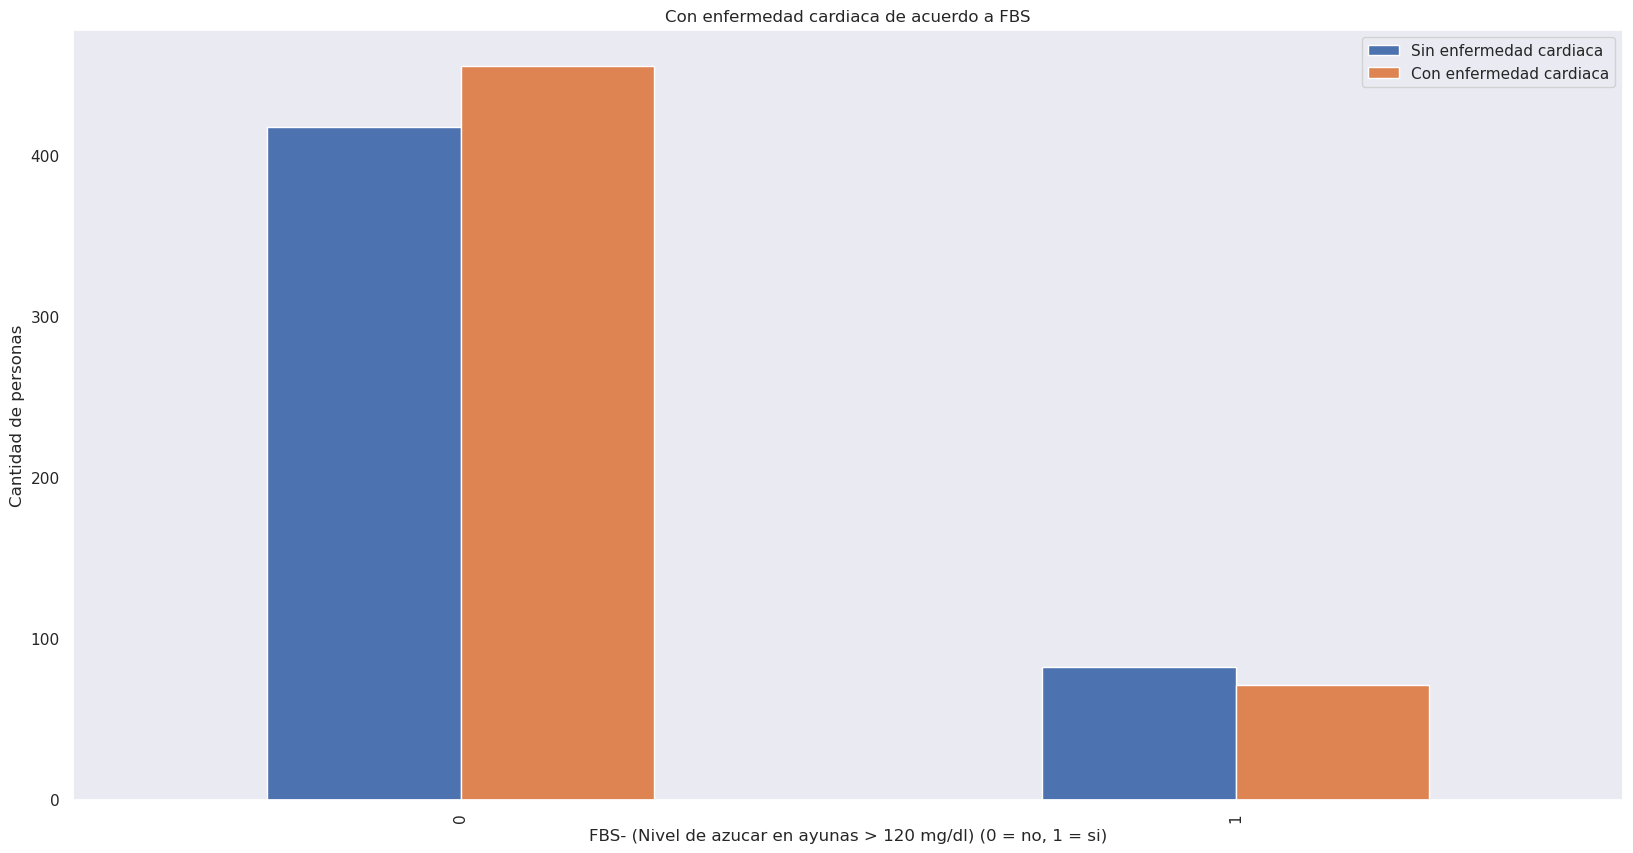

In [64]:
pd.crosstab(heart_df.fbs,heart_df.target).plot(kind="bar",figsize=(20,10))
plt.title("Con enfermedad cardiaca de acuerdo a FBS")
plt.xlabel('FBS- (Nivel de azucar en ayunas > 120 mg/dl) (0 = no, 1 = si)')
plt.xticks(rotation=90)
plt.legend(["Sin enfermedad cardiaca", "Con enfermedad cardiaca"])
plt.ylabel('Cantidad de personas')
plt.show()

### Pacientes enfermos en relacion con la angina de pecho

De acuerdo al siguiente gráfico de barras se puede que las personas con dolor de tipo 1 (angina atipica) y tipo 2 (no anginoso) tienden a ser los 
pacientes que están con una condicion cardiaca.

<Axes: xlabel='cp', ylabel='target'>

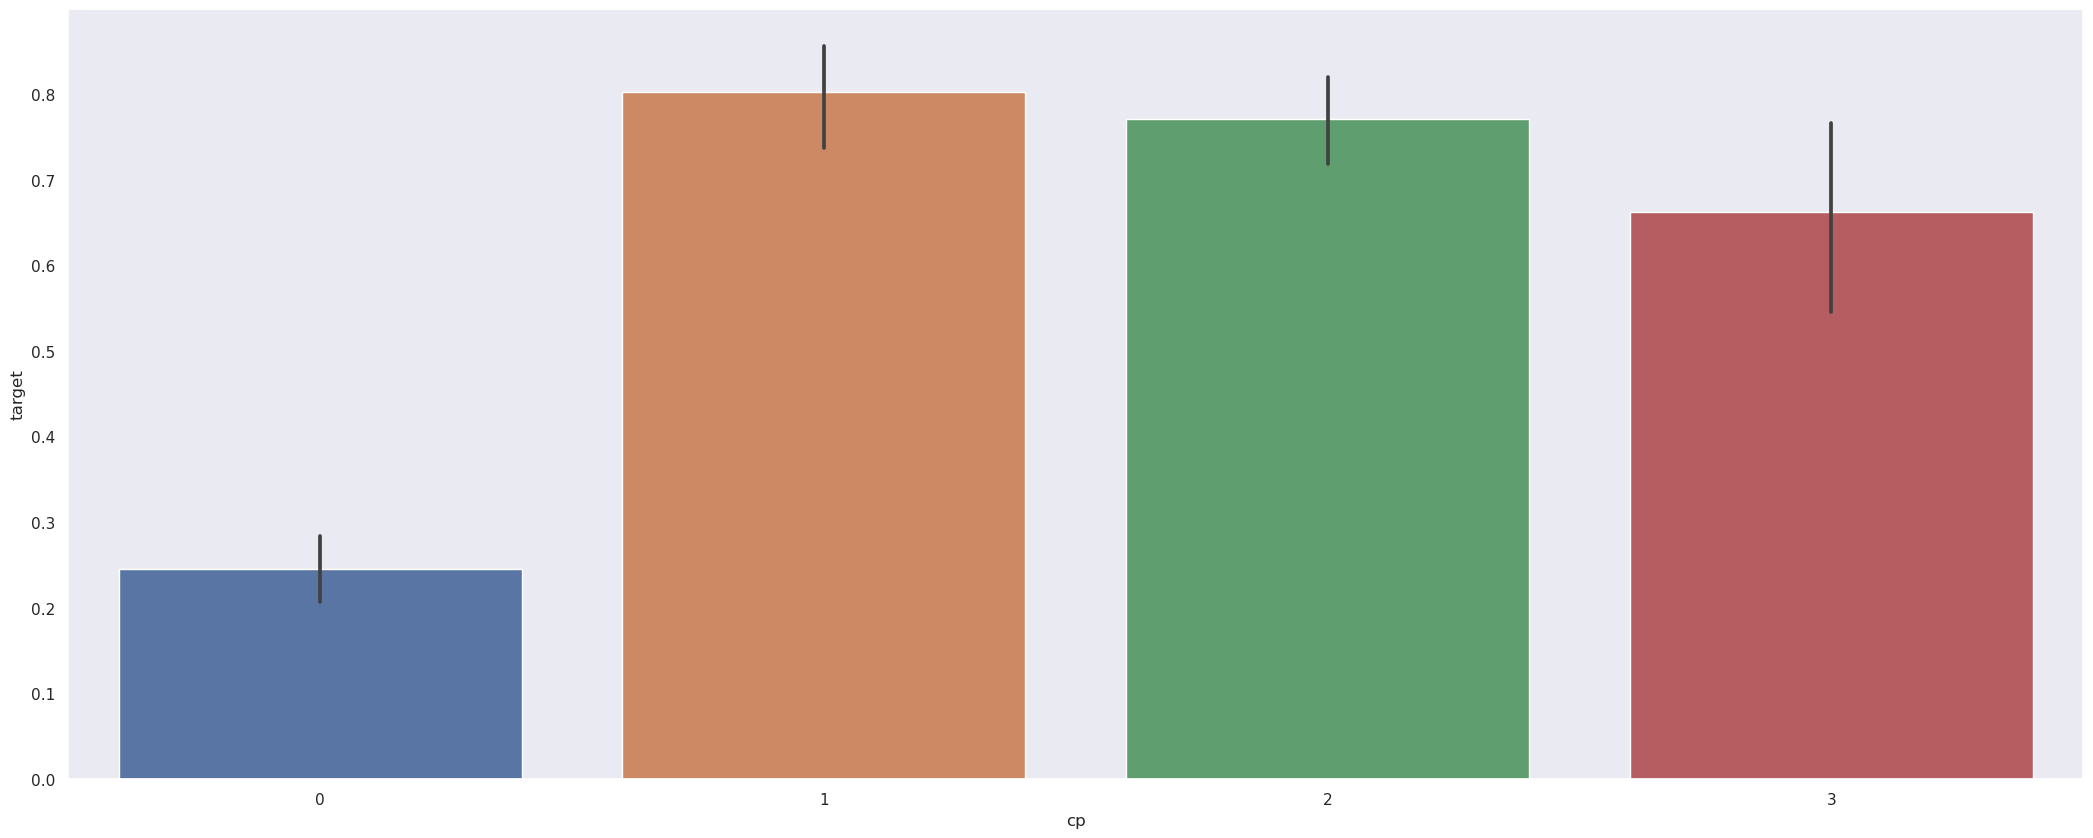

In [65]:
plt.figure(figsize=(26, 10))
sns.barplot(x=heart_df["cp"], y=heart_df['target'], data=heart_df)

### Relacion entre el colesterol y la presión arterial

La presion arterial es el principal factor de riesgo para sufrir una enfermedad cardiovascular. Segun la organizacion panamerica de la salud, cada 
año mueren 1.6 millones de personas por enfermedades cardiovasculares en la region de las americas. Es importante saber que el colesterol se
relaciona con la presion arterial, ya que este hace que las venas acumulen placa y se estrechen por ende el corazon debe trabajar más cuerte para
poder bombear la suficiente sangre al cuerpo. Debido a lo anterior se hace la siguiente gráfica para ver como los pacientes del conjunto de datos
presentan problemas de presion arterial y como esta se relaciona con el colesterol, segun informes medicos el colesterol debe está por debajo de 200 
para estar en buenas condiciones fisicas.

Como se puede observar en la gráfica, las personas con colesterol mayor a 200 tienden a tener mayor presion arterial, lo que es un indicio para tener
complicaciones cardiacas. Si estos pacientes no presentaran enfermedad cardiaca, esto sería un motivo de alarma por el cual cuidarse y cambiar los
estilos de vida para prevenir que aparezcan cardiopatias en el futuro.

Fuente: https://www.paho.org/es/temas/hipertension

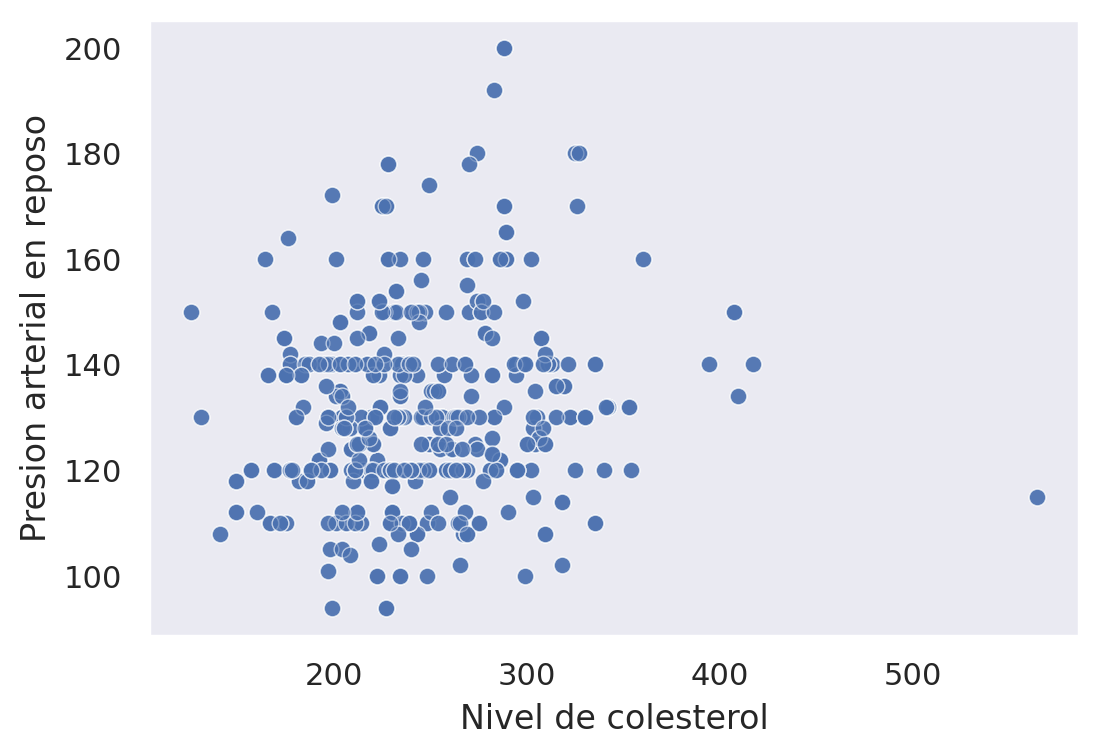

In [66]:
plt.figure(figsize=(6, 4), dpi=200)

sns.scatterplot(data=heart_df, x='chol', y='trestbps', alpha=0.6)

plt.xlabel('Nivel de colesterol')
plt.ylabel('Presion arterial en reposo')
plt.show()

## 3. Machine learning - Regresion Logistica

Decidi analizar como se comportaria un algoritmo de machine learning que creo que se ajusta perfectamente a los datos que se tienen y a la variable 
objetiva que se quiere concluir. En este caso el algoritmo elegido fue Regresion Logistica, ya que es muy bueno en temas de clasificacion binaria como
en este caso que se quiere concluir si una persona tienen enfermedad cardiovascular o no. Además de los anteriores este modelo tiene una facil
implementacion utilizando la libreria scikit-learn, lo cual es util en este caso.

Segun los datos arrojados el modelo en el conjunto de entrenamiento logro una precision aproximada del 0.7741, de lo cual se puede decir que clasifico
correctamente alrededor del 77.41% de las muestras. Para el cojunto de pruebas la precision aproximada fue de 0.7955 lo que significa que el modelo
clasifico correctamente alrededor del 79.55% de las muestras. En general una precision del 77-79% puede ser considerada decente dependiendo del
contexto del problema. 

En conclusion los resultados del modelo muestran que la precision en el conjunto de pruebas es mayor en comparacion con el conjunto de entrenamiento,
esto sugiere que el modelo generaliza bien a nuevos datos y no está sobreajustado a los datos de entrenamiento. 

In [67]:
# Preparar las entradas y salidas.
X = heart_df[['age', 'chol', 'trestbps', 'fbs', 'exang', 'oldpeak', 'slope', 'restecg', 'cp']].values
y = heart_df[['target']].values

In [68]:
# Seleccion de datos para el entrenamiento y las pruebas, se deja 30% para pruebas y 70% para el entrenamiento. La aleatoriedad es constante.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [69]:
# Entrenando el modelo.
# C me permite controlar la fuerza de regulazion del modelo de regresion logistica y ayuda a preevenir el overfitting.
# penalty permite seleccionar el tipo de regularizacion que aplicara al modelo.
# solver permite especificar el algoritmo de optimizacion para ajustar los parametros del model. 
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [70]:
# Cálculo de la precision del modelo en los datos de entrenamiento.
model.score(X_train, y_train)

0.7740585774058577

In [71]:
# Cálculo de la precision del modelo en los datos de prueba.
model.score(X_test, y_test)

0.7954545454545454

## 4. Consultas con SQL

Se realizó una forma alternativa de utilizar los datos empleando la base de datos PostgreSQL y para su gestionamiento y la conexion se utilizó la
libreria psycopg2 que es muy popular para python. Esto es una alternativa a cuando los datos vienen diferente a una rchivo csv u otro tipo de
formatos. 

In [72]:
# Establecer la conexion a la base de datos.
conn = psycopg2.connect(
    dbname='heart-db',
    user='admin',
    host='localhost',
    port=5432,
    password='admin123'
)

### Relacion de los pacientes enfermos y el nivel de azucar en la sangre

De esta forma se podria utilizar los datos almacenados en PostgreSQL para ver como se relacionan los pacientes enfermos con el nivel de azucar en
ayunas. Como se puede observar el nivel de azucar en la sangre en este conjunto de datos no es el mayor factor para tener una condicion cardiaca.

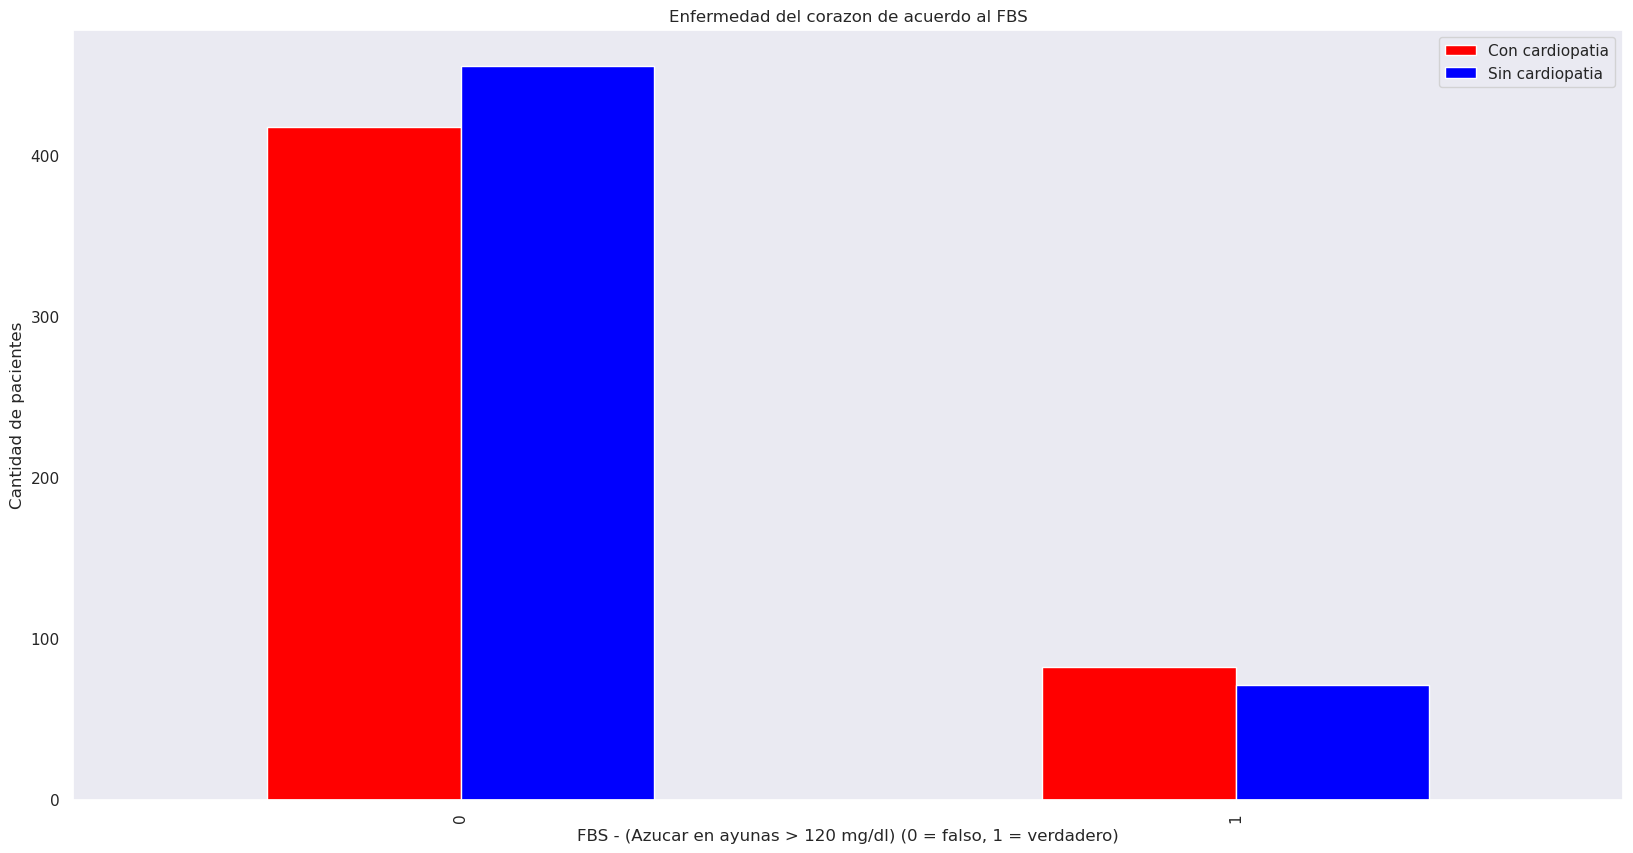

In [73]:
query1 = 'SELECT fbs, target FROM heart_data'

with conn:
    azucar_df = pd.read_sql_query(query1, conn)

pd.crosstab(azucar_df['fbs'], azucar_df['target']).plot(kind='bar', figsize=(20,10), color=['red', 'blue'])
plt.title('Enfermedad del corazon de acuerdo al FBS')
plt.xlabel('FBS - (Azucar en ayunas > 120 mg/dl) (0 = falso, 1 = verdadero)')
plt.xticks(rotation=90)
plt.legend(['Con cardiopatia', 'Sin cardiopatia'])
plt.ylabel('Cantidad de pacientes')
plt.show()

### Presión arterial VS enfermedad cardiovascular

De esta forma podemos analizar como se relacionan los pacientes que presentan presion aterial alta y alguna enfermedad cardiovascular. Para este caso
los pacientes que menos tuvieron enfermedad del corazon fueron los que tienen la presion arterial entre 118 y 152.

(<Axes: xlabel='trestbps', ylabel='target'>,)

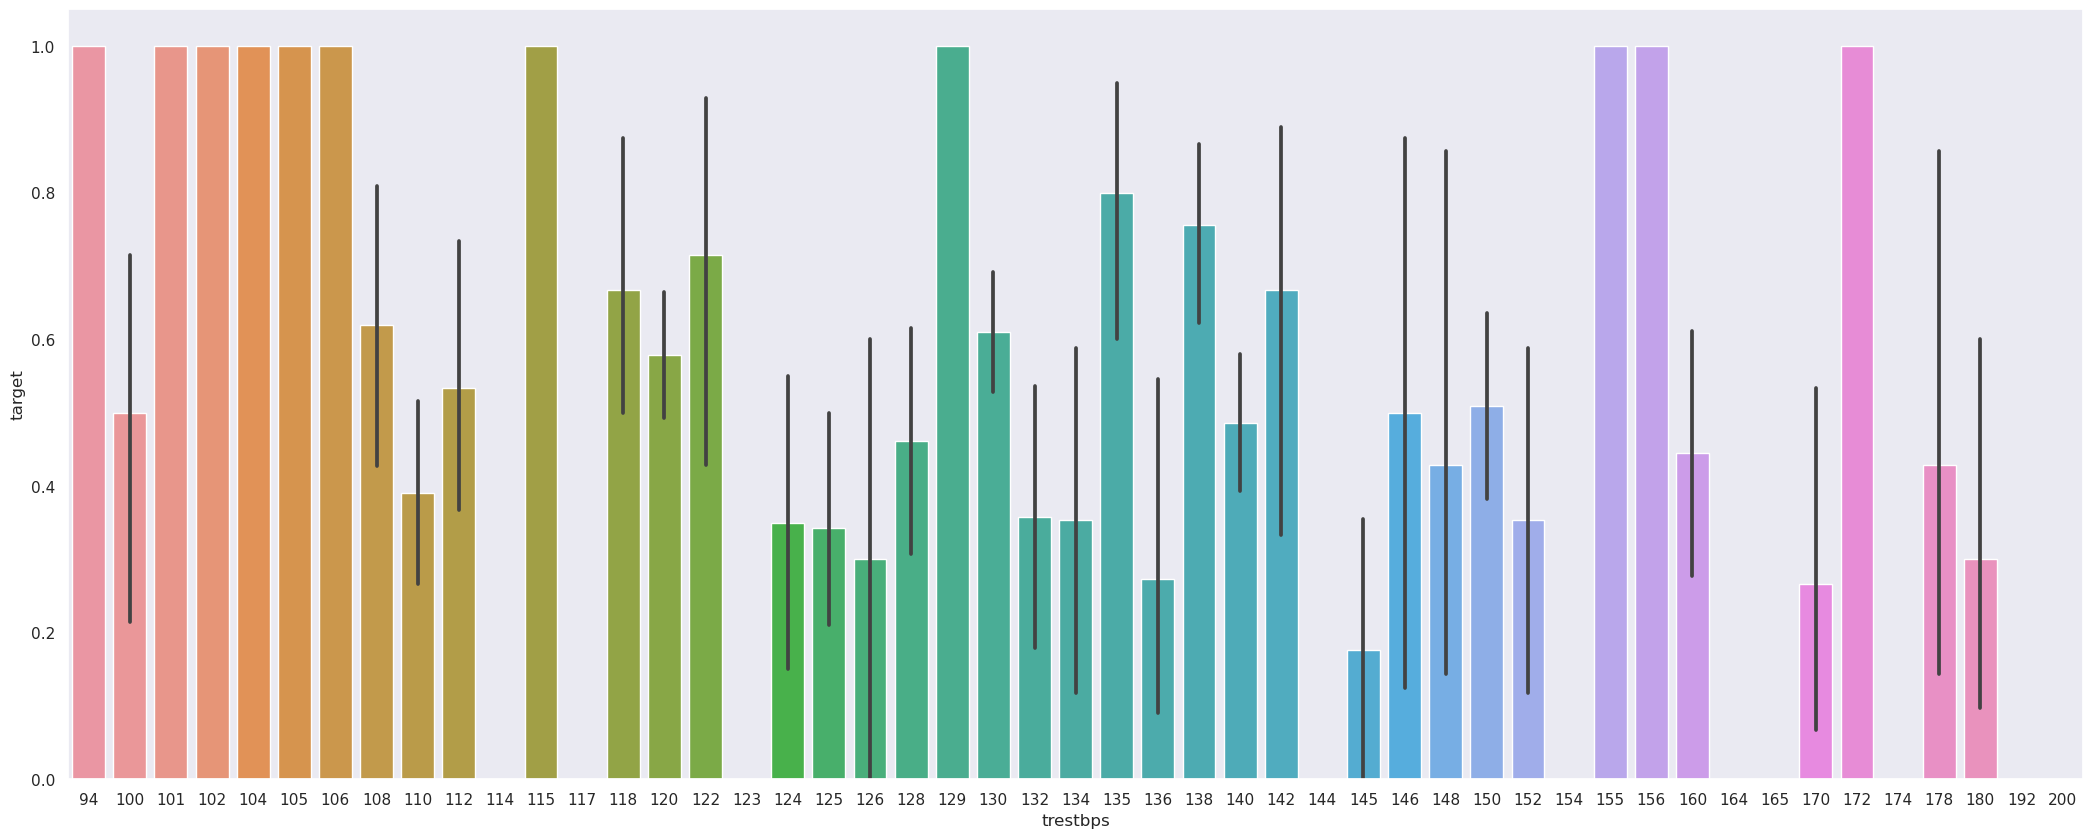

In [74]:
query2 = 'SELECT trestbps, target FROM heart_data'

with conn:
    arterial_df = pd.read_sql_query(query2, conn)
    
plt.figure(figsize=(26, 10))
sns.barplot(x=arterial_df['trestbps'], y=arterial_df['target']), 

### Relacion de las variables VS la variable a predecir

Utilizando el siguiente mapa de calor se puede observar como se correlacionan las distintas variables con la variable objetiva. La correlación puede
ser negativa (el aumento en los valores de una característica disminuye el valor de la variable objetivo) o positiva (el aumento en los valores de
una característica aumenta el valor de la variable objetivo).

Según el mapa de calor anterior, cp y thalach afectan la variable objetivo más, mientras que exang y oldpeak afectan negativamente la variable
objetiva.

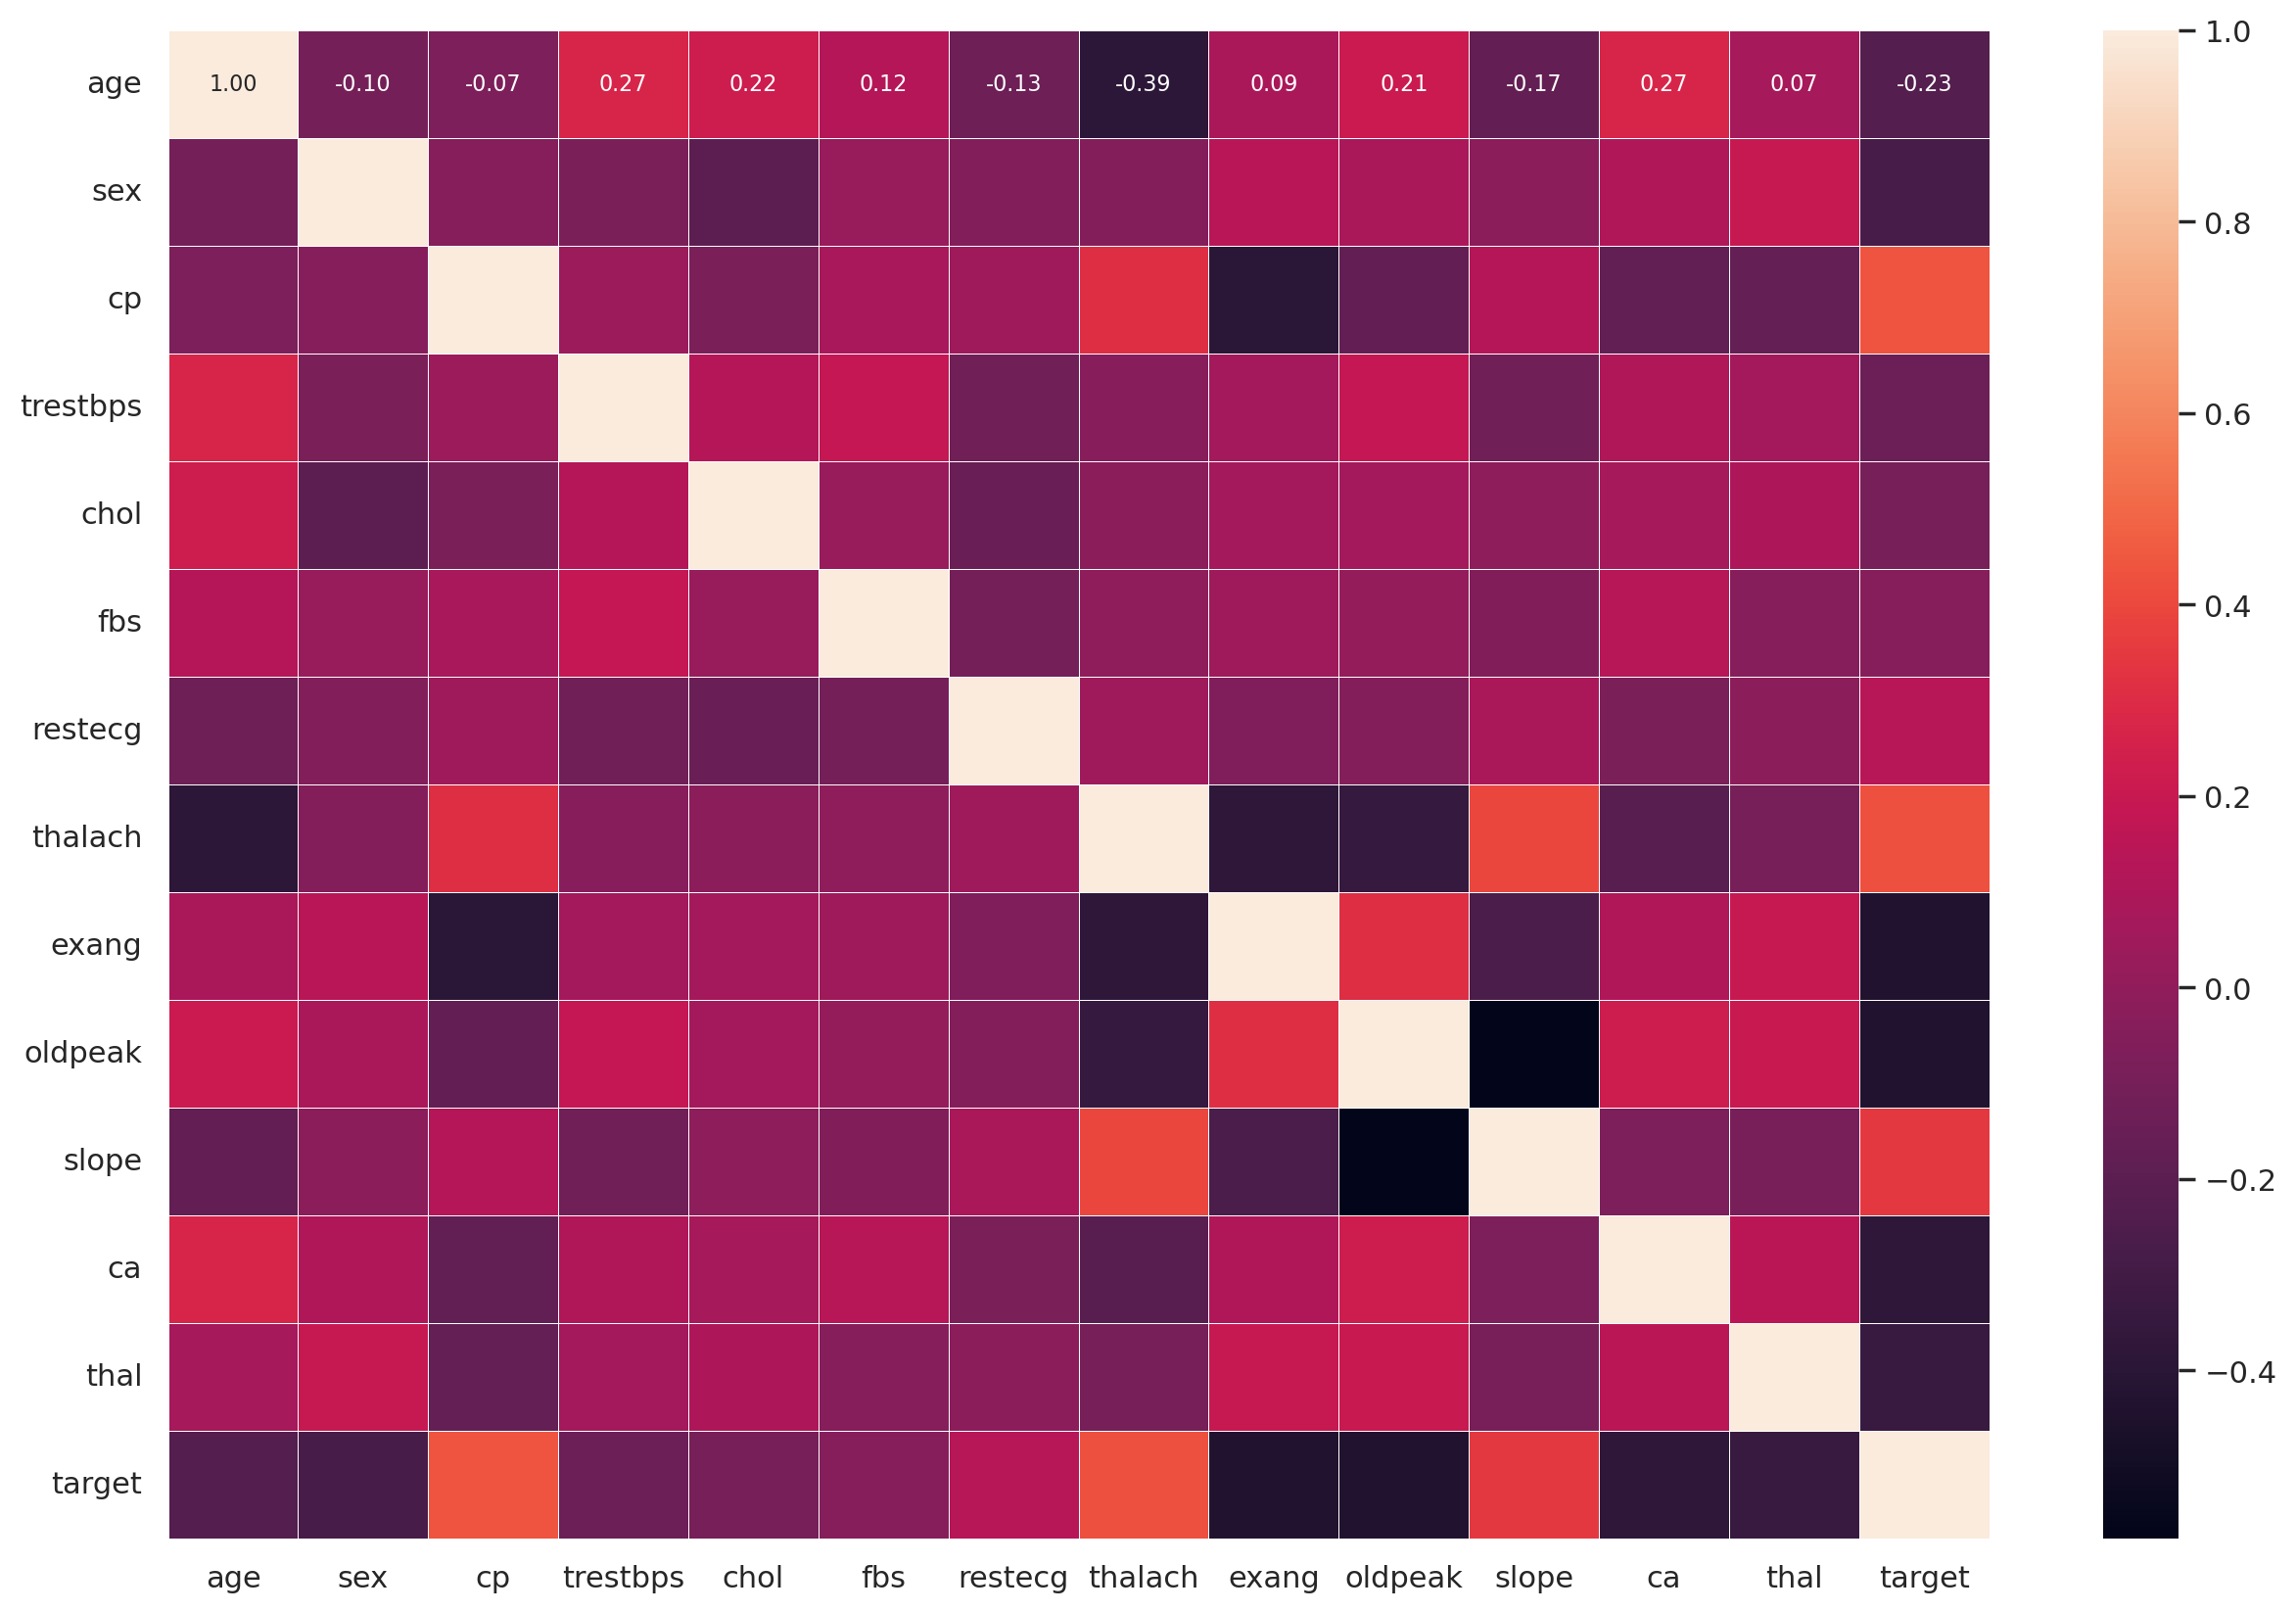

In [75]:
query3 = 'SELECT age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target  FROM heart_data'

with conn:
    variables_df = pd.read_sql_query(query3, conn)
    
plt.figure(figsize=(15, 10), dpi=200)
sns.heatmap(data=variables_df.corr(), annot=True, linewidths=0.3, annot_kws={'size':8}, fmt='.2f')
plt.show()

## Referencias
1. https://www.who.int/ - Organizacion mundial de la salud
2. https://www.mayoclinic.org/es - Mayo Clinic
3. https://www.paho.org/es - Organizacion panamericana de la salud
4. https://www.ibm.com/es-es/topics/machine-learning-algorithms - IBM machine learning
5. https://seaborn.pydata.org/ - Seaborn
6. https://aws.amazon.com/es/what-is/logistic-regression/ - Amazon machine learning
7. https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica - Wikipedia regresion logistica


***Prompts***
1. ¿Qué tipos de algoritmos de machine learning serían una buena eleccion para predecir una enfermedad cardiaca?
2. ¿Qué criterio deberia tener en cuenta al momento de elegir las opciones para los argumentos de una regresion logistica utilizando scikit-learn?
3. ¿Cuándo es más conveniente utilizar una gráfica circular VS una de barras?
